# Week 6 練習と総合問題解答

In [ ]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３位まで表示
%precision 3

'%.3f'

####  <練習問題 6-1>
`sklearn.datasets`モジュールの`make_blobs`関数を使い、`random_state=52`（特に数字に意味はありません）にしてデータを生成しグラフ化してみましょう。そこからクラスタリングをしてください。いくつのグループに分けますか。また分けた後は、クラスター番号がわかるように色分けして、グラフ化してください。

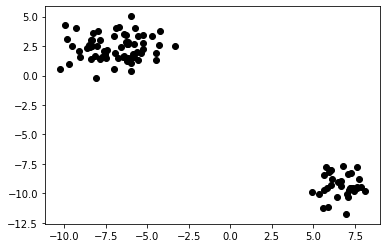

In [ ]:
# 解答（1）　グラフ化
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=52)
plt.scatter(X[:,0], X[:,1], color='black')

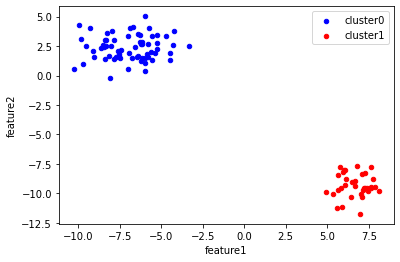

In [ ]:
# 解答（2）　クラスター分析
kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 順にx座標、y座標、cluster番号のデータを横に結合するためconcatでaxis=1を指定しています。
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(
        x='feature1', y='feature2', 
        color=colors[i], label=f'cluster{i}', ax=ax
    )

####  <練習問題 6-2>
先ほど扱ったデータ`bank_sub_std`に対して、クラスター数を4にしてk-meansを実行した場合、どのような結果になるでしょうか。<練習問題 6-1>と同様に、クラスター番号を取得した後、それぞれのクラスターについての分析して特徴を読み取りましょう。またクラスター数を8にした場合はどうでしょうか。さらに、`age`、`balance`、`campaign`、`previous`以外の変数を選んだ場合はどうでしょうか。

＜解答方針例＞

本章で実行した`KMeans`のオプションでn_clustersに4や8を入れて実行しましょう。他の方法としては、本章とほぼ同じです。

kmeans = KMeans(init='random', n_clusters=4, random_state=0)

`age`、`balance`、`campaign`、`previous`以外の変数として、たとえば、`day`と`duration`をセットするときは、以下のようにして、変数をセットします。

bank_sub = bank[['day','duration']]

####  <練習問題 6-3>
`sklearn.datasets`モジュールの`load_iris`関数を使ってアヤメのデータを読み込み、iris.dataを対象に主成分分析を行ってください。ただし、抽出する主成分の数は2とします。さらに第ニ主成分までのデータと目的変数（`iris.target`）との関係性をグラフ化などし考察してください。

In [ ]:
# 解答 （1）　主成分分析
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

# 主成分分析の実行
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元：{}'.format(iris.data.shape))
print('主成分分析後のデータ次元：{}'.format(X_pca.shape))

主成分分析前のデータ次元：(150, 4)
主成分分析後のデータ次元：(150, 2)


上記で抽出された第一主成分、第二主成分に目的変数を結合しグラフ化してみます。$x$軸を第一主成分、$y$軸を第二主成分、目的変数は、「0を`setosa`」「1を`versicolor`」「2を`virginica`」とします。第一主成分の大小によって、目的変数をかなり識別できそうだとわかります。

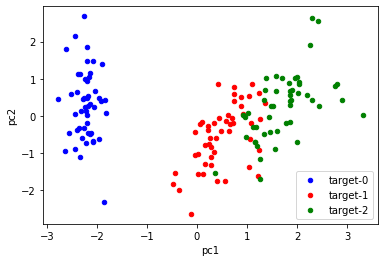

In [ ]:
# 解答（2）　グラフ化
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]), pd.DataFrame(iris.target)], axis=1)
merge_data.columns = ['pc1','pc2', 'target']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('target'):
    ax = data.plot.scatter(
        x='pc1', y='pc2',
        color=colors[i], label=f'target-{i}', ax=ax
    )

なお参考ですが、以下は目的変数とそれぞれの4つの説明変数との関係を示した図です。以下より`setosa`を見分けるだけでしたら、他の変数（`petal`、`length`など）でも閾値を決めて見分けることができそうです。第一主成分がどの元変数と相関が高いかなど追加で調査してみましょう。

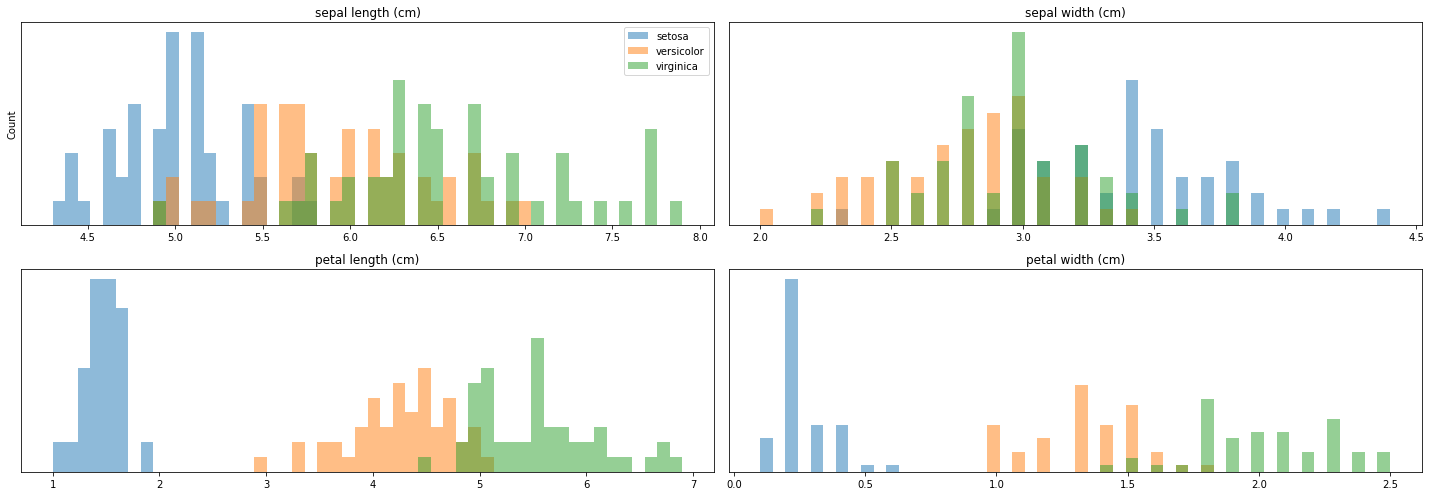

In [ ]:
# 参考　目的変数とそれぞれの4つの説明変数との関係を示す
fig, axes = plt.subplots(2,2,figsize=(20,7))

iris_0 = iris.data[iris.target==0]
iris_1 = iris.data[iris.target==1]
iris_2 = iris.data[iris.target==2]

ax = axes.ravel()
for i in range(4):
    _,bins = np.histogram(iris.data[:,i],bins=50)
    ax[i].hist(iris_0[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_1[:,i],bins=bins,alpha=.5)
    ax[i].hist(iris_2[:,i],bins=bins,alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_ylabel('Count')
ax[0].legend(['setosa','versicolor','virginica'], loc='best')
fig.tight_layout()

####  <練習問題 6-4>

6.4「マーケットバスケット分析とアソシエーションルール」で用いた購買履歴データを使って、任意の商品の組み合わせについて、支持度、確信度、リフト値を算出してみましょう。

＜解答方針例＞

たとえば、85123Aと47566を組み合わせる場合は、本章と同様に以下のようなフィルターをかけて、計算していきます。支持度、確信度、リフト値については同様の計算方法で算出できます。


trans_a = set(trans[trans['StockCode']=='85123A'].InvoiceNo)

trans_b = set(trans[trans['StockCode']=='47566'].InvoiceNo)

## 6.5 総合問題

### ■ 総合問題6-1 アソシエーションルール
6.4「マーケットバスケット分析とアソシエーションルール」で用いた購買履歴データ（Online Retail.xlsx）を使って、どの商品とどの商品の組み合わせの支持度が一番高いか、その組み合わせを求めてください　ただし、レコード数が1,000より多い商品（`StockCode`）を対象に計算してください。

（ヒント：商品の組み合わせを抽出するときは、`itertools`モジュールが便利です。）

<b>本問はhomework6を解くための問題のため，模範解答の公開は行いません．</b>